In [6]:
%matplotlib notebook

import arcpy
import os
import sys
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import fiona as f
import scipy
import statsmodels

import geopandas as gp
import mplleaflet
from shapely.geometry import box as shape_box
# from shapely.geometry import Polygon
# import dbf2df as dbf
import gdal
gdal.UseExceptions()
import ogr
import osr
# import pickle
import pandas as pd
# from model_specs import *
# pth = 'MFGrid/mfgrid'
# sys.path.append(pth)
# import grid
from IPython.display import Image
from IPython.display import Math

from __future__ import print_function
import statsmodels.api as sm

from sklearn import linear_model

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from arcpy import env

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

height has been deprecated.



In [7]:
# Set environment settings
env.workspace = r"C:\Local_GIS\Vienna\Tree_soil_correlation\Soil"

In [8]:
#Import soil data
soil_file = r'C:\Local_GIS\Vienna\Tree_soil_correlation\All_samples_StatePlane.shp'
soil_s = gp.read_file(soil_file)

In [17]:
# #Import soil data
# trees_ft = all_trees.to_crs(soil.crs)

In [18]:
# trees = r'U:\MST\Vienna\GIS\All_trees_summarized.shp'

# inFeatures = "All_trees_summarized"
# fieldName1 = "buffer_fie"
# fieldPrecision = 9
# fieldLength = 10
 
# # Execute AddField twice for two new fields
# arcpy.AddField_management(inFeatures, fieldName1, "DOUBLE", fieldPrecision,
#                           field_is_nullable="NULLABLE")

In [9]:
maxbuffer=50

In [6]:
# for x in range(1,maxbuffer+1):
#     try:
#         arcpy.CopyFeatures_management("All_trees_summarized_ft.shp","All_trees_summarized_ft_{}x.shp".format(x))
#     except:
#         pass

In [7]:
# for x in range(1,maxbuffer+1):
#     arcpy.CalculateField_management("All_trees_summarized_ft_{}x.shp".format(x),"buffer_fie",'!Average_Tr!*{}/12'.format(x),'PYTHON_9.3')


### Selecting and creating shapefiles for the desired depth intervals of soil samples from 0 to 18 ft

In [8]:
# if arcpy.Exists("lyr"):
#     arcpy.Delete_management("lyr")
# for s in range(1,maxbuffer+1):
#     for i in range(0,18,1):
#         for x in range(i+1,19,1):
#             arcpy.MakeFeatureLayer_management(soil_file, "lyr")
#             arcpy.SelectLayerByAttribute_management("lyr", "ADD_TO_SELECTION", '"Depth_bott" <={} and "Depth_top" >={}'.format(x,i))
#             arcpy.CopyFeatures_management("lyr", "soil_{}to{}ft_{}x".format(i,x,s))

#             if arcpy.Exists("lyr"):
#                 arcpy.Delete_management("lyr")

In [9]:
# # Buffer areas around trees

# for x in range(1,maxbuffer+1):

#     trees = "All_trees_summarized_ft_{}x.shp".format(x)
   
#     distanceField = "buffer_fie"

#     trees_buffer = r"All_trees_summarized_buffer_{}x.shp".format(x)

#     arcpy.Buffer_analysis(trees, trees_buffer, buffer_distance_or_field=distanceField)


# # trees = "All_trees_summarized_ft.shp"
# # trees_10x = "All_trees_summarized_ft_10x.shp"
# # trees_20x = "All_trees_summarized_ft_20x.shp"
# # trees_40x = "All_trees_summarized_ft_40x.shp"
# # trees_buffer = r"All_trees_summarized_buffer.shp"
# # distanceField = "buffer_fie"

# # trees_buffer_10x = r"All_trees_summarized_buffer_10x.shp"
# # trees_buffer_20x = r"All_trees_summarized_buffer_20x.shp"
# # trees_buffer_40x = r"All_trees_summarized_buffer_40x.shp"

# # # arcpy.Buffer_analysis(trees, trees_buffer, buffer_distance_or_field=distanceField)
# # arcpy.Buffer_analysis(trees_10x, trees_buffer_10x, buffer_distance_or_field=distanceField)
# # arcpy.Buffer_analysis(trees_20x, trees_buffer_20x, buffer_distance_or_field=distanceField)
# # arcpy.Buffer_analysis(trees_40x, trees_buffer_40x, buffer_distance_or_field=distanceField)


In [28]:
# for s in range(1,maxbuffer+1):
#     for i in range(0,18,1):
#         for x in range(i+1,19,1):
#             soil=r"soil_{}to{}ft_{}x.shp".format(i,x,s)
#             outfc = r"Tree_soil_matches_{}to{}ft_{}x.shp".format(i,x,s)

#             trees_buffer = r"All_trees_summarized_buffer_{}x.shp".format(s)

#             fieldmappings = arcpy.FieldMappings()
#             fieldmappings.addTable(trees_buffer)
#             fieldmappings.addTable(soil)
#             PCEFieldIndex = fieldmappings.findFieldMapIndex("TETRACHLOR")
#             TCEFieldIndex = fieldmappings.findFieldMapIndex("TRICHLOROE")
#             CFCFieldIndex = fieldmappings.findFieldMapIndex("a112_Trich")
#             fieldmap = fieldmappings.getFieldMap(PCEFieldIndex)
#             fieldmap2 = fieldmappings.getFieldMap(TCEFieldIndex)
#             fieldmap3 = fieldmappings.getFieldMap(CFCFieldIndex)

#             # Get the output field's properties as a field object
#             field = fieldmap.outputField
#             field2 = fieldmap2.outputField
#             field3 = fieldmap3.outputField

#             # Rename the field and pass the updated field object back into the field map
#             field.name = "mean_PCE_soil"
#             field.aliasName = "mean_PCE_soil"
#             fieldmap.outputField = field

#             field2.name = "mean_TCE_soil"
#             field2.aliasName = "mean_TCE_soil"
#             fieldmap2.outputField = field2

#             field3.name = "mean_CFC_soil"
#             field3.aliasName = "mean_CFC_soil"
#             fieldmap3.outputField = field3

#             # Set the merge rule to mean and then replace the old fieldmap in the mappings object
#             # with the updated one
#             fieldmap.mergeRule = "mean"
#             fieldmap2.mergeRule = "mean"
#             fieldmap3.mergeRule = "mean"
#             fieldmappings.replaceFieldMap(PCEFieldIndex, fieldmap)
#             fieldmappings.replaceFieldMap(TCEFieldIndex, fieldmap2)
#             fieldmappings.replaceFieldMap(CFCFieldIndex, fieldmap3)

#             arcpy.SpatialJoin_analysis(trees_buffer, soil, outfc, "JOIN_ONE_TO_ONE", "KEEP_COMMON", fieldmappings, "CONTAINS")



## Single SLR

In [2]:
# trees_soil_matched_file = 'C:\Local_GIS\Vienna\Tree_soil_correlation\Soil\Tree_soil_matches_6to7ft_18x.shp'
# matched = gp.read_file(trees_soil_matched_file)

# # soil_file = 'C:\Local_GIS\Vienna\Tree_soil_correlation\soil_6to7ft.shp'
# # soil = gp.read_file(soil_file)

# matched.loc[matched['Average_PC']<=4.7,'Average_PC']=4.7
# matched.loc[matched['mean_PCE_s']<=1,'mean_PCE_s']=np.nan
# # trees_gw_pce.loc[trees_gw_pce['TETRACHL_2']=='U','TETRACHLOR']  = 2
# matched['soil_log_pce'] = np.log(matched['mean_PCE_s'])
# matched['tree_log_pce'] = np.log(matched['Average_PC'])


# # matched.loc[matched['Average_TC']<=7.7,'Average_TC']=7.7
# # # matched.loc[matched['TRICHLOR_2']=='U','TRICHLOROE']  = 2
# # matched.loc[matched['mean_TCE_s']==1,'mean_TCE_s']  = np.nan
# # matched['soil_log_tce'] = np.log(matched['mean_TCE_s'])
# # matched['tree_log_tce'] = np.log(matched['Average_TC'])


# # matched.loc[matched['Average_CF']==1,'Average_CF']=np.nan
# # matched.loc[matched['mean_CFC_s']==1,'mean_CFC_s']  = np.nan
# # matched['soil_log_cfc'] = np.log(matched['mean_CFC_s'])
# # matched['tree_log_cfc'] = np.log(matched['Average_CF'])

# # X1 = sm.add_constant(matched.tree_log_cfc)
# # model_cfc = sm.OLS(matched.soil_log_cfc,X1, missing='drop')
# # results_cfc = model_cfc.fit()

# # print(results_cfc.summary())

# # rho_cfc = scipy.stats.spearmanr(matched.soil_log_cfc, matched.tree_log_cfc, nan_policy='omit')
# # print(rho_cfc.pvalue)



# # X2 = sm.add_constant(matched.tree_log_tce)
# # model_tce = sm.OLS(matched.soil_log_tce,X2, missing='drop')
# # results_tce = model_tce.fit()

# # print(results_tce.summary())

# # rho_tce = scipy.stats.spearmanr(matched.soil_log_tce, matched.tree_log_tce, nan_policy='omit')


# X3 = sm.add_constant(matched.soil_log_pce)
# model_pce = sm.OLS(matched.tree_log_pce,X3, missing='drop')
# results_pce = model_pce.fit()

# # print(results_pce.summary())

# # rho_pce = scipy.stats.spearmanr(matched.soil_log_pce, matched.tree_log_pce,nan_policy='omit')


# # ax = soil.plot()
# # matched.plot(ax=ax, cmap='Pastel1',alpha=0.01,linewidth=0.1)

# fig = plt.figure(dpi=300)
# statsmodels.graphics.regressionplots.plot_regress_exog(results_pce,1, fig=fig)
# plt.savefig("TOC_art_Soil_Scatter.pdf")

# print(results_pce.summary())

# # fig, ax = plt.subplots()
# # ax.scatter(matched.soil_log_pce,matched.tree_log_pce)
# # for gw, tree, diam in zip(matched.soil_log_pce, matched.tree_log_pce, matched.Average_Tr):                                       # <--
# #     ax.annotate('{}'.format(diam),xy=(gw, tree))
# # plt.xlabel('Log GW Concentration')
# # plt.ylabel('Log Tree Concentration')
# # plt.plot([0,6],[results_pce.params[0],6*results_pce.params[1]])
    
# plt.show()


# # fig = plt.figure()

# # ax1 = fig.add_subplot(211)
# # plt.title('PCE')
# # plt.ylabel('Log Tree')
# # plt.xlabel('Log Soil')
# # ax1.plot( matched.soil_log_pce,matched.tree_log_pce,linestyle='None', marker='o', markersize=2)
# # # plt.axis('equal')
# # plt.grid('on')
# # plt.plot(range(10),'--')

# # ax2 = fig.add_subplot(212)
# # ax2.plot( results_pce.fittedvalues, results_pce.resid,linestyle='None', marker='o', markersize=2)
# # # plt.axis('equal')
# # plt.grid('on')
# # plt.ylabel('Residual')
# # plt.xlabel('Predicted')


# # ax3 = fig.add_subplot(233)
# # plt.title('TCE')
# # plt.ylabel('Log GW')
# # plt.xlabel('Log Tree')
# # ax3.plot(trees_gw_tce.tree_log_tce, trees_gw_tce.soil_log_tce,linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# # plt.grid('on')
# # # plt.plot(range(10),'--')

# # ax4 = fig.add_subplot(234)
# # ax4.plot(results_tce.resid, results_tce.fittedvalues, linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# # plt.grid('on')
# # plt.ylabel('Predicated')
# # plt.xlabel('Residual')



In [73]:
# Columns=[]
# for i in range(0,17,1):
#     for x in range(i+1,18,1):
#         Columns.append('R2-PCE_{}to{}ft'.format(i,x))
#         Columns.append('PCE_c_{}to{}ft'.format(i,x))
#         Columns.append('PCE_p_{}to{}ft'.format(i,x))
#         Columns.append('PCE_n_{}to{}ft'.format(i,x))
#         Columns.append('R2-CFC_{}to{}ft'.format(i,x))
#         Columns.append('CFC_c_{}to{}ft'.format(i,x))
#         Columns.append('CFC_p_{}to{}ft'.format(i,x))
#         Columns.append('CFC_n_{}to{}ft'.format(i,x))
#         Columns.append('R2-TCE_{}to{}ft'.format(i,x))
#         Columns.append('TCE_c_{}to{}ft'.format(i,x))
#         Columns.append('TCE_p_{}to{}ft'.format(i,x))
#         Columns.append('TCE_n_{}to{}ft'.format(i,x))
        
# Indices=range(0,153,1)

# stats_SLR = pd.DataFrame(columns=Columns,index=np.arange(1,maxbuffer+1))



## Looping the SLR 

In [75]:
# from IPython.html.widgets import FloatProgress
# from IPython.display import display
# from time import sleep

# for s in range(1,maxbuffer+1):
#     j=1
#     for i in range(0,17,1):
#         for x in range(i+1,18,1):
#             trees_soil_matched = 'C:\Local_GIS\Vienna\Tree_soil_correlation\Soil\Tree_soil_matches_{}to{}ft_{}x.shp'.format(i,x,s)
#             matched = gp.read_file(trees_soil_matched)
            
#             try:
#                 matched.loc[matched['Average_PC']<=0.47,'Average_PC']=0.47
#                 matched.loc[matched['mean_PCE_s']<=0,'mean_PCE_s']=np.nan
#                 # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
#                 matched['soil_log_pce'] = np.log(matched['mean_PCE_s'])
#                 matched['tree_log_pce'] = np.log(matched['Average_PC'])
#             except:
#                 pass

#             try:
#                 matched.loc[matched['Average_TC']<=7.7,'Average_TC']=np.nan
#                 # matched.loc[matched['TRICHLOR_1']=='U','TRICHLOROE']  = 1
#                 matched.loc[matched['mean_TCE_s']==0,'mean_TCE_s']  = np.nan
#                 matched['soil_log_tce'] = np.log(matched['mean_TCE_s'])
#                 matched['tree_log_tce'] = np.log(matched['Average_TC'])
#             except:
#                 pass

#             try:
#                 matched.loc[matched['Average_CF']==0,'Average_CF']=np.nan
#                 matched.loc[matched['mean_CFC_s']==0,'mean_CFC_s']  = np.nan
#                 matched['soil_log_cfc'] = np.log(matched['mean_CFC_s'])
#                 matched['tree_log_cfc'] = np.log(matched['Average_CF'])
#             except:
#                 pass
            
#             try:
# #                 X = matched[['soil_log_pce','Average_Tr']]
# #                 X3 = sm.add_constant(X)
#                 X3 = sm.add_constant(matched.tree_log_pce)
#                 model_pce = sm.OLS(matched.soil_log_pce,X3, missing='drop')
#                 results_pce = model_pce.fit()

#                 stats_SLR.iloc[s-1,(j-1)*12+0]=results_pce.rsquared_adj
#                 stats_SLR.iloc[s-1,(j-1)*12+1]=results_pce.pvalues.loc['const']
#                 stats_SLR.iloc[s-1,(j-1)*12+2]=results_pce.pvalues.loc['tree_log_pce']
#                 stats_SLR.iloc[s-1,(j-1)*12+3]=results_pce.df_resid+2

#             except:
#                 stats_SLR.iloc[s-1,(j-1)*12+0]=np.nan
#                 stats_SLR.iloc[s-1,(j-1)*12+1]=np.nan
#                 stats_SLR.iloc[s-1,(j-1)*12+2]=np.nan
#                 stats_SLR.iloc[s-1,(j-1)*12+3]=np.nan        
                
#             try:
# #                 X = matched[['soil_log_cfc','Average_Tr']]
# #                 X1 = sm.add_constant(X)
#                 X1 = sm.add_constant(matched.tree_log_cfc)
#                 model_cfc = sm.OLS(matched.soil_log_cfc,X1, missing='drop')
#                 results_cfc = model_cfc.fit()

#                 stats_SLR.iloc[s-1,(j-1)*12+4]=results_cfc.rsquared_adj
#                 stats_SLR.iloc[s-1,(j-1)*12+5]=results_cfc.pvalues.loc['const']
#                 stats_SLR.iloc[s-1,(j-1)*12+6]=results_cfc.pvalues.loc['tree_log_cfc']
#                 stats_SLR.iloc[s-1,(j-1)*12+7]=results_cfc.df_resid+2


#             except:
#                 stats_SLR.iloc[s-1,(j-1)*12+4]=np.nan
#                 stats_SLR.iloc[s-1,(j-1)*12+5]=np.nan
#                 stats_SLR.iloc[s-1,(j-1)*12+6]=np.nan
#                 stats_SLR.iloc[s-1,(j-1)*12+7]=np.nan



#             try:
# #                 X = matched[['soil_log_tce','Average_Tr']]
# #                 X2 = sm.add_constant(X)
#                 X2 = sm.add_constant(matched.tree_log_tce)
#                 model_tce = sm.OLS(matched.soil_log_tce,X2, missing='drop')
#                 results_tce = model_tce.fit()

#                 stats_SLR.iloc[s-1,(j-1)*12+8]=results_tce.rsquared_adj
#                 stats_SLR.iloc[s-1,(j-1)*12+9]=results_tce.pvalues.loc['const']
#                 stats_SLR.iloc[s-1,(j-1)*12+10]=results_tce.pvalues.loc['tree_log_tce']
#                 stats_SLR.iloc[s-1,(j-1)*12+11]=results_tce.df_resid+2

#             except:
#                 stats_SLR.iloc[s-1,(j-1)*12+8]=np.nan
#                 stats_SLR.iloc[s-1,(j-1)*12+9]=np.nan
#                 stats_SLR.iloc[s-1,(j-1)*12+10]=np.nan
#                 stats_SLR.iloc[s-1,(j-1)*12+11]=np.nan
                




#             j+=1

#         else:
#             pass
# #             print('done with {} of 14450'.format(i*s*x))
# #             f = FloatProgress(min=0, max=maxbuffer*17*17)
# #             display(f)
# #             for z in xrange(maxbuffer*17*17):
# #                sleep(0.1)
# #                f.value = z

# # stats_SLR.to_excel('U:\MST\Vienna\Statistics\Tree_soil_stats_SLR_MLR_aboveMDL.xlsx')



In [76]:
# stats_SLR.to_excel("All_buffers_Soil_SLR.xlsx")

In [5]:
stats_SLR = pd.read_excel("All_buffers_Soil_SLR.xlsx")
stats_MLR = pd.read_excel("All_buffers_Soil_MLR.xlsx")

In [20]:
# Columns=[]
# for i in range(0,17,1):
#     for x in range(i+1,18,1):
#         Columns.append('R2-PCE_{}to{}ft'.format(i,x))
#         Columns.append('PCE_c_{}to{}ft'.format(i,x))
#         Columns.append('PCE_p_{}to{}ft'.format(i,x))
#         Columns.append('PCE_p2_{}to{}ft'.format(i,x))
#         Columns.append('PCE_n_{}to{}ft'.format(i,x))
#         Columns.append('R2-CFC_{}to{}ft'.format(i,x))
#         Columns.append('CFC_c_{}to{}ft'.format(i,x))
#         Columns.append('CFC_p_{}to{}ft'.format(i,x))
#         Columns.append('CFC_p2_{}to{}ft'.format(i,x))
#         Columns.append('CFC_n_{}to{}ft'.format(i,x))
#         Columns.append('R2-TCE_{}to{}ft'.format(i,x))
#         Columns.append('TCE_c_{}to{}ft'.format(i,x))
#         Columns.append('TCE_p_{}to{}ft'.format(i,x))
#         Columns.append('TCE_p2_{}to{}ft'.format(i,x))
#         Columns.append('TCE_n_{}to{}ft'.format(i,x))
        
# Indices=range(0,153,1)

# stats_MLR = pd.DataFrame(columns=Columns,index=np.arange(1,maxbuffer+1))

In [21]:
matched

,Altit_top,Average_CF,Average_PC,Average_TC,Average_Tr,BUFF_DIST,CIS12DICHL,CIS12DIC_1,Date,Depth_bott,Depth_top,Gen_Specie,IDENT,Join_Count,Land_surfa,Last_SAMPL,Last_Speci,Location,Maximum_X_,Maximum_Y_,Media,ORIG_FID,RASTERVALU,Root_rad,Sample_alt,TARGET_FID,TETRACHL_1,TRICHLOR_1,X,Y,a112_Tri_1,buffer_fie,geometry,mean_CFC_s,mean_PCE_s,mean_TCE_s,DiaBin,soil_log_pce,tree_log_pce,soil_log_tce,tree_log_tce,soil_log_cfc,tree_log_cfc
0,820.61420,NaN,1207.0000,75.000,8.0,33.333333,0.0,None,2014-04-03,16.0,16.0,None,TC001,2,836.61420,2011-09-08,Birch,P010,-91.944096,38.189568,SO,0,255,6.096000,820.61420,0,None,None,1.800188e+06,858316.517557,None,33.333333,"POLYGON ((1800186.62860008 858357.8536298249, ...",NaN,41.6,NaN,0,3.7281,7.095893,NaN,4.317488,NaN,NaN
1,820.61420,NaN,616.0000,NaN,8.0,33.333333,0.0,None,2014-04-03,16.0,16.0,None,TC002,2,836.61420,2011-09-08,Elm,P010,-91.944118,38.189587,SO,1,255,6.096000,820.61420,1,None,None,1.800188e+06,858316.517557,None,33.333333,"POLYGON ((1800180.264439579 858364.7345215727,...",NaN,41.6,NaN,0,3.7281,6.423247,NaN,NaN,NaN,NaN
2,817.33336,NaN,0.4700,NaN,16.0,66.666667,0.0,None,2014-04-02,16.0,16.0,None,TC058,1,833.33336,2011-09-15,Elm,A032,-91.943534,38.189663,SO,57,254,12.192000,817.33336,57,None,None,1.800345e+06,858341.129290,None,66.666667,"POLYGON ((1800347.942253828 858426.750868405, ...",NaN,NaN,NaN,0,NaN,-0.755023,NaN,NaN,NaN,NaN
3,817.33336,NaN,37.8144,NaN,38.7,161.250000,0.0,None,2014-04-02,16.0,16.0,None,TC321,1,833.33336,2014-07-29,Oak,A032,-91.943232,38.189928,SO,319,254,29.489399,817.33336,319,None,None,1.800345e+06,858341.129290,None,161.250000,"POLYGON ((1800434.15861683 858618.3559893221, ...",NaN,NaN,NaN,0,NaN,3.632690,NaN,NaN,NaN,NaN
4,820.61420,NaN,402.3532,59.675,10.0,41.666667,0.0,None,2014-04-03,16.0,16.0,None,TC323,2,836.61420,2014-07-29,Elm,P010,-91.944014,38.189636,SO,321,255,7.620000,820.61420,321,None,None,1.800188e+06,858316.517557,None,41.666667,"POLYGON ((1800210.047516495 858391.0907847385,...",NaN,41.6,NaN,0,3.7281,5.997330,NaN,4.088913,NaN,NaN


##  Looped MLR

In [ ]:

for j in range(1,maxbuffer+1):
    s=1
    for i in range(0,17,1):
        for x in range(i+1,18,1):
            trees_soil_matched = 'C:\Local_GIS\Vienna\Tree_soil_correlation\Soil\Tree_soil_matches_{}to{}ft_{}x.shp'.format(i,x,j)
            matched = gp.read_file(trees_soil_matched)
            matched['DiaBin']=0
            
            try:
                matched.loc[matched['Average_PC']<=0.47,'Average_PC']=0.47
                matched.loc[matched['mean_PCE_s']<=0,'mean_PCE_s']=np.nan
                # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
                matched['soil_log_pce'] = np.log(matched['mean_PCE_s'])
                matched['tree_log_pce'] = np.log(matched['Average_PC'])
            except:
                pass
            try:
                for z in range(0,len(matched.DiaBin)):
                    if matched.Average_Tr.iloc[z]<6:
                        matched.DiaBin.iloc[z]=0
                    elif matched.Average_Tr.iloc[z]<20:
                        matched.DiaBin.iloc[z]=1
                    elif matched.Average_Tr.iloc[z]>=20:
                        matched.DiaBin.iloc[z]=2
            except:
                pass


            try:
                matched.loc[matched['Average_TC']<=7.7,'Average_TC']=np.nan
                # matched.loc[matched['TRICHLOR_1']=='U','TRICHLOROE']  = 1
                matched.loc[matched['mean_TCE_s']==0,'mean_TCE_s']  = np.nan
                matched['soil_log_tce'] = np.log(matched['mean_TCE_s'])
                matched['tree_log_tce'] = np.log(matched['Average_TC'])
            except:
                pass
            try:
                matched.loc[matched['Average_CF']==0,'Average_CF']=np.nan
                matched.loc[matched['mean_CFC_s']==0,'mean_CFC_s']  = np.nan
                matched['soil_log_cfc'] = np.log(matched['mean_CFC_s'])
                matched['tree_log_cfc'] = np.log(matched['Average_CF'])
            except:
                pass
            try:
                X = matched[['tree_log_pce','DiaBin']]
                X3 = sm.add_constant(X)
    #             X3 = sm.add_constant(matched.tree_log_pce)
                model_pce = sm.OLS(matched.soil_log_pce,X3, missing='drop')
                results_pce = model_pce.fit()

                stats_MLR.iloc[j-1,(s-1)*15+0]=results_pce.rsquared_adj
                stats_MLR.iloc[j-1,(s-1)*15+1]=results_pce.pvalues.loc['const']
                stats_MLR.iloc[j-1,(s-1)*15+2]=results_pce.pvalues.loc['tree_log_pce']
                stats_MLR.iloc[j-1,(s-1)*15+3]=results_pce.pvalues.loc['DiaBin']
                stats_MLR.iloc[j-1,(s-1)*15+4]=results_pce.df_resid+3

            except:
                stats_MLR.iloc[j-1,(s-1)*15+0]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+1]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+2]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+3]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+4]=np.nan
                
            try:
                X = matched[['tree_log_cfc','DiaBin']]
                X1 = sm.add_constant(X)
    #             X1 = sm.add_constant(matched.tree_log_cfc)
                model_cfc = sm.OLS(matched.soil_log_cfc,X1, missing='drop')
                results_cfc = model_cfc.fit()

                stats_MLR.iloc[j-1,(s-1)*15+5]=results_cfc.rsquared_adj
                stats_MLR.iloc[j-1,(s-1)*15+6]=results_cfc.pvalues.loc['const']
                stats_MLR.iloc[j-1,(s-1)*15+7]=results_cfc.pvalues.loc['tree_log_cfc']
                stats_MLR.iloc[j-1,(s-1)*15+8]=results_cfc.pvalues.loc['DiaBin']
                stats_MLR.iloc[j-1,(s-1)*15+9]=results_cfc.df_resid+3


            except:
                stats_MLR.iloc[j-1,(s-1)*15+5]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+6]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+7]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+8]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+9]=np.nan



            try:
                X = matched[['tree_log_tce','DiaBin']]
                X2 = sm.add_constant(X)
    #             X2 = sm.add_constant(matched.tree_log_tce)
                model_tce = sm.OLS(matched.soil_log_tce,X2, missing='drop')
                results_tce = model_tce.fit()

                stats_MLR.iloc[j-1,(s-1)*15+10]=results_tce.rsquared_adj
                stats_MLR.iloc[j-1,(s-1)*15+11]=results_tce.pvalues.loc['const']
                stats_MLR.iloc[j-1,(s-1)*15+12]=results_tce.pvalues.loc['tree_log_tce']
                stats_MLR.iloc[j-1,(s-1)*15+13]=results_tce.pvalues.loc['DiaBin']
                stats_MLR.iloc[j-1,(s-1)*15+14]=results_tce.df_resid+3

            except:
                stats_MLR.iloc[j-1,(s-1)*15+10]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+11]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+12]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+13]=np.nan
                stats_MLR.iloc[j-1,(s-1)*15+14]=np.nan



            s+=1

        else:
            pass
        
print('Done')

# stats_MLR.to_excel('U:\MST\Vienna\Statistics\Tree_soil_stats_MLR_MLR_aboveMDL.xlsx')



In [16]:
stats_MLR.to_excel("All_buffers_Soil_MLR_Binned_Diameter.xlsx")

In [13]:
colors = ['#F99B00','#FB0032','#8F009A','#180F9B','#006F41','#8D4200','#201258','#C19967','#A79D95','#91B0BD','#6AC3F2','#66A48B','b']
# colors

## R2 Curves

<IPython.core.display.Javascript object>


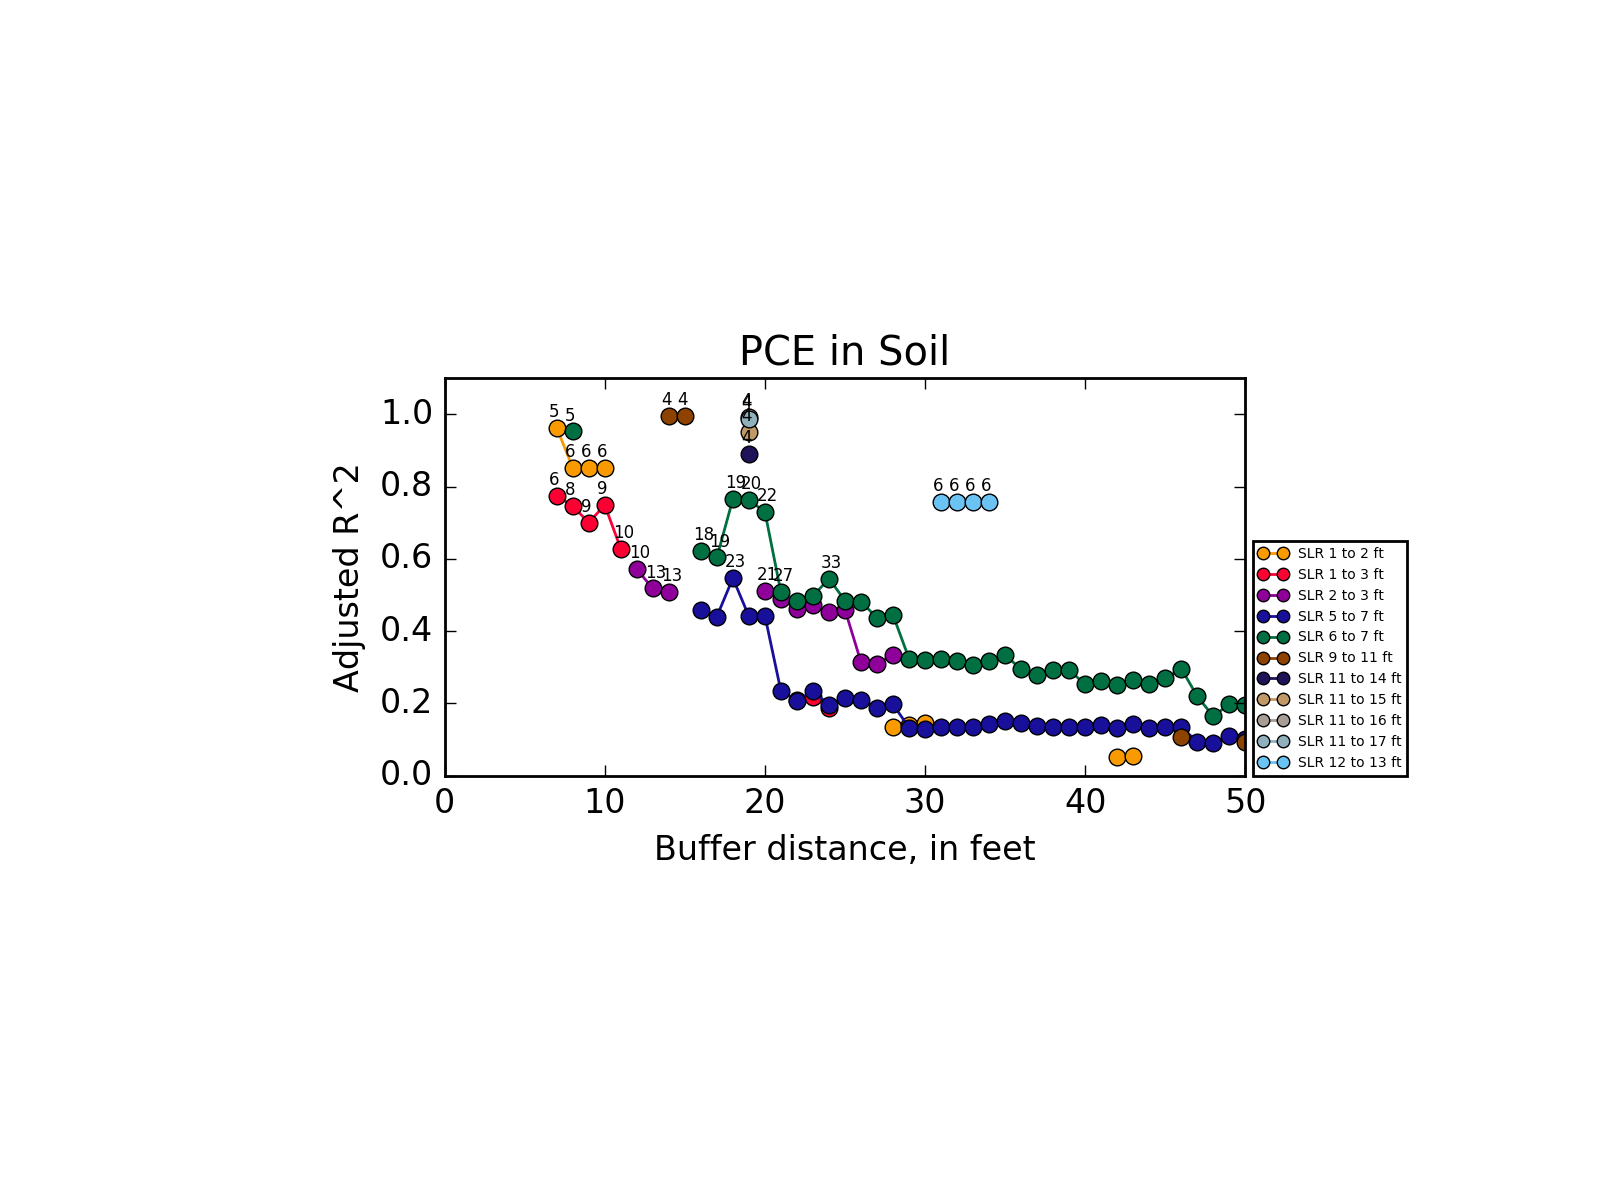

<IPython.core.display.Javascript object>


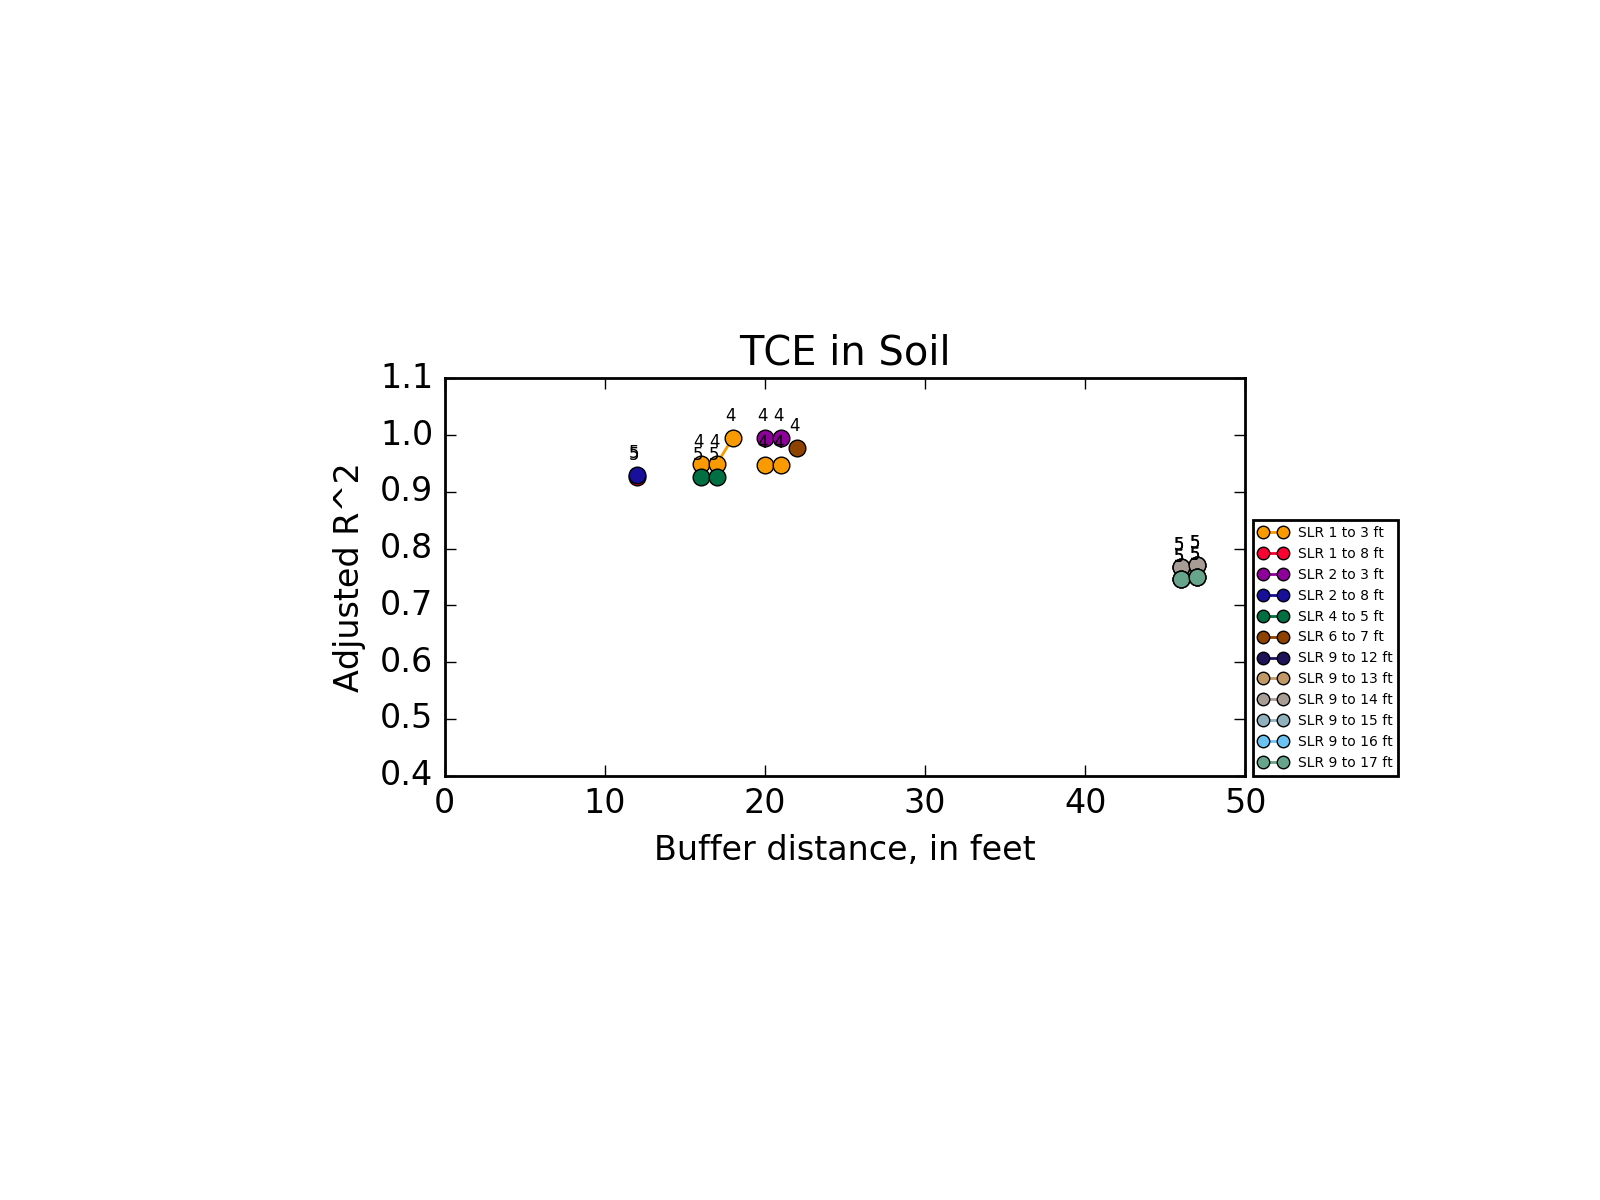

In [23]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots(dpi=200)

maxp=0.5

s=1
for i in range(0,17,1):
    for x in range(i+1,18,1):
        stats_SLR['PCE_plot_{}to{}ft'.format(i,x)]=np.nan
        stats_SLR['CFC_plot_{}to{}ft'.format(i,x)]=np.nan
        stats_SLR['TCE_plot_{}to{}ft'.format(i,x)]=np.nan


        stats_SLR.loc[(stats_SLR.iloc[:,(s-1)*12+1]<0.05)&(stats_SLR.iloc[:,(s-1)*12+2]<0.05)&(stats_SLR.iloc[:,(s-1)*12+3]>3),'PCE_plot_{}to{}ft'.format(i,x)]=stats_SLR.iloc[:,(s-1)*12+0]
        stats_SLR.loc[(stats_SLR.iloc[:,(s-1)*12+5]<0.05)&(stats_SLR.iloc[:,(s-1)*12+6]<0.05)&(stats_SLR.iloc[:,(s-1)*12+7]>3),'CFC_plot_{}to{}ft'.format(i,x)]=stats_SLR.iloc[:,(s-1)*12+4]
        stats_SLR.loc[(stats_SLR.iloc[:,(s-1)*12+9]<0.05)&(stats_SLR.iloc[:,(s-1)*12+10]<0.05)&(stats_SLR.iloc[:,(s-1)*12+11]>3),'TCE_plot_{}to{}ft'.format(i,x)]=stats_SLR.iloc[:,(s-1)*12+8]

        s+=1
z=0  
for i in range(0,17,1):
    for x in range(i+1,18,1):
        if (stats_SLR['PCE_plot_{}to{}ft'.format(i,x)].max()>maxp):
            for index, r2, n in zip(stats_SLR.index, stats_SLR['PCE_plot_{}to{}ft'.format(i,x)], stats_SLR['PCE_n_{}to{}ft'.format(i,x)]):                                       # <--
                if r2>maxp:
                    ax.annotate('{}'.format(int(n)),xy=(index-0.5, r2+.03),fontsize=6)
            
            slr, = ax.plot(stats_SLR['PCE_plot_{}to{}ft'.format(i,x)],'-o', label='SLR {} to {} ft'.format(i,x),color=colors[z])
#             slr, = ax.plot(stats_SLR['R2-PCE_{}to{}ft'.format(i,x)],'-o', alpha=0.2,color=colors[z])
            z+=1
        else:
            pass

plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc=(1.01,0),fontsize=5, ncol=1,markerscale=0.75)

# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.xlabel('Buffer distance, in feet')
plt.ylabel('Adjusted R^2')
plt.title('PCE in Soil')
plt.xlim(0,50)
plt.ylim(0,1.1)
plt.tight_layout(pad=10)
plt.savefig("Soil_SLR_PCE.pdf")
    
plt.show()

# fig, ax = plt.subplots(dpi=200)
# for i in range(0,17,1):
#     for x in range(i+1,18,1):
#         if (stats_SLR['CFC_plot_{}to{}ft'.format(i,x)].max()>0):
            
#             slr, = ax.plot(stats_SLR['CFC_plot_{}to{}ft'.format(i,x)],'-o', label='SLR {} to {} ft'.format(i,x))
#             slr, = ax.plot(stats_MLR['R2-CFC_{}to{}ft'.format(i,x)],'-o', alpha=0.2)
#         else:
#             pass
# plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc=(1.01,0.25),fontsize=5, ncol=1,markerscale=0.75)

# # for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
# #     ax.annotate('{}'.format(species),xy=(gw, tree))
# plt.title('CFC-113')
# plt.xlabel('Buffer distance, in feet')
# plt.ylabel('Adjusted R^2')
# plt.xlim(0,50)
# plt.ylim(0,1)
# plt.tight_layout(pad=10)
# plt.savefig("Soil_SLR_CFC.pdf")
   
# plt.show()

fig, ax = plt.subplots(dpi=200)

z=0
for i in range(0,17,1):
    for x in range(i+1,18,1):
        if (stats_SLR['TCE_plot_{}to{}ft'.format(i,x)].max()>0):
            for index, r2, n in zip(stats_SLR.index, stats_SLR['TCE_plot_{}to{}ft'.format(i,x)], stats_SLR['TCE_n_{}to{}ft'.format(i,x)]):                                       # <--
                if r2>maxp:
                    ax.annotate('{}'.format(int(n)),xy=(index-0.5, r2+.03),fontsize=6)            
            slr, = ax.plot(stats_SLR['TCE_plot_{}to{}ft'.format(i,x)],'-o', label='SLR {} to {} ft'.format(i,x),color=colors[z])
#             slr, = ax.plot(stats_MLR['R2-TCE_{}to{}ft'.format(i,x)],'-o', alpha=0.2,color=colors[z])
            z+=1
        else:
            pass
plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc=(1.01,0),fontsize=5, ncol=1,markerscale=0.75)

# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.title('TCE in Soil')
plt.xlabel('Buffer distance, in feet')
plt.ylabel('Adjusted R^2')
plt.xlim(0,50)
plt.ylim(0.4,1.1)
plt.tight_layout(pad=10)
plt.savefig("Soil_SLR_TCE.pdf")
   
plt.show()

In [20]:
stats_MLR

,R2-PCE_0to1ft,PCE_c_0to1ft,PCE_p_0to1ft,PCE_p2_0to1ft,PCE_n_0to1ft,R2-CFC_0to1ft,CFC_c_0to1ft,CFC_p_0to1ft,CFC_p2_0to1ft,CFC_n_0to1ft,R2-TCE_0to1ft,TCE_c_0to1ft,TCE_p_0to1ft,TCE_p2_0to1ft,TCE_n_0to1ft,R2-PCE_0to2ft,PCE_c_0to2ft,PCE_p_0to2ft,PCE_p2_0to2ft,PCE_n_0to2ft,R2-CFC_0to2ft,CFC_c_0to2ft,CFC_p_0to2ft,CFC_p2_0to2ft,CFC_n_0to2ft,R2-TCE_0to2ft,TCE_c_0to2ft,TCE_p_0to2ft,TCE_p2_0to2ft,TCE_n_0to2ft,R2-PCE_0to3ft,PCE_c_0to3ft,PCE_p_0to3ft,PCE_p2_0to3ft,PCE_n_0to3ft,R2-CFC_0to3ft,CFC_c_0to3ft,CFC_p_0to3ft,CFC_p2_0to3ft,CFC_n_0to3ft,R2-TCE_0to3ft,TCE_c_0to3ft,TCE_p_0to3ft,TCE_p2_0to3ft,TCE_n_0to3ft,R2-PCE_0to4ft,PCE_c_0to4ft,PCE_p_0to4ft,PCE_p2_0to4ft,PCE_n_0to4ft,R2-CFC_0to4ft,CFC_c_0to4ft,CFC_p_0to4ft,CFC_p2_0to4ft,CFC_n_0to4ft,R2-TCE_0to4ft,TCE_c_0to4ft,TCE_p_0to4ft,TCE_p2_0to4ft,TCE_n_0to4ft,R2-PCE_0to5ft,PCE_c_0to5ft,PCE_p_0to5ft,PCE_p2_0to5ft,PCE_n_0to5ft,R2-CFC_0to5ft,CFC_c_0to5ft,CFC_p_0to5ft,CFC_p2_0to5ft,CFC_n_0to5ft,R2-TCE_0to5ft,TCE_c_0to5ft,TCE_p_0to5ft,TCE_p2_0to5ft,TCE_n_0to5ft,R2-PCE_0to6ft,PCE_c_0to6ft,PCE_p_0to6ft,PCE_p2_0to6ft,PCE_n_0to6ft,R2-CFC_0to6ft,CFC_c_0to6ft,CFC_p_0to6ft,CFC_p2_0to6ft,CFC_n_0to6ft,R2-TCE_0to6ft,TCE_c_0to6ft,TCE_p_0to6ft,TCE_p2_0to6ft,TCE_n_0to6ft,R2-PCE_0to7ft,PCE_c_0to7ft,PCE_p_0to7ft,PCE_p2_0to7ft,PCE_n_0to7ft,R2-CFC_0to7ft,CFC_c_0to7ft,CFC_p_0to7ft,CFC_p2_0to7ft,CFC_n_0to7ft,R2-TCE_0to7ft,TCE_c_0to7ft,TCE_p_0to7ft,TCE_p2_0to7ft,TCE_n_0to7ft,R2-PCE_0to8ft,PCE_c_0to8ft,PCE_p_0to8ft,PCE_p2_0to8ft,PCE_n_0to8ft,R2-CFC_0to8ft,CFC_c_0to8ft,CFC_p_0to8ft,CFC_p2_0to8ft,CFC_n_0to8ft,R2-TCE_0to8ft,TCE_c_0to8ft,TCE_p_0to8ft,TCE_p2_0to8ft,TCE_n_0to8ft,R2-PCE_0to9ft,PCE_c_0to9ft,PCE_p_0to9ft,PCE_p2_0to9ft,PCE_n_0to9ft,R2-CFC_0to9ft,CFC_c_0to9ft,CFC_p_0to9ft,CFC_p2_0to9ft,CFC_n_0to9ft,R2-TCE_0to9ft,TCE_c_0to9ft,TCE_p_0to9ft,TCE_p2_0to9ft,TCE_n_0to9ft,R2-PCE_0to10ft,PCE_c_0to10ft,PCE_p_0to10ft,PCE_p2_0to10ft,PCE_n_0to10ft,R2-CFC_0to10ft,CFC_c_0to10ft,CFC_p_0to10ft,CFC_p2_0to10ft,CFC_n_0to10ft,R2-TCE_0to10ft,TCE_c_0to10ft,TCE_p_0to10ft,TCE_p2_0to10ft,TCE_n_0to10ft,R2-PCE_0to11ft,PCE_c_0to11ft,PCE_p_0to11ft,PCE_p2_0to11ft,PCE_n_0to11ft,R2-CFC_0to11ft,CFC_c_0to11ft,CFC_p_0to11ft,CFC_p2_0to11ft,CFC_n_0to11ft,R2-TCE_0to11ft,TCE_c_0to11ft,TCE_p_0to11ft,TCE_p2_0to11ft,TCE_n_0to11ft,R2-PCE_0to12ft,PCE_c_0to12ft,PCE_p_0to12ft,PCE_p2_0to12ft,PCE_n_0to12ft,R2-CFC_0to12ft,CFC_c_0to12ft,CFC_p_0to12ft,CFC_p2_0to12ft,CFC_n_0to12ft,R2-TCE_0to12ft,TCE_c_0to12ft,TCE_p_0to12ft,TCE_p2_0to12ft,TCE_n_0to12ft,R2-PCE_0to13ft,PCE_c_0to13ft,PCE_p_0to13ft,PCE_p2_0to13ft,PCE_n_0to13ft,R2-CFC_0to13ft,CFC_c_0to13ft,CFC_p_0to13ft,CFC_p2_0to13ft,CFC_n_0to13ft,R2-TCE_0to13ft,TCE_c_0to13ft,TCE_p_0to13ft,TCE_p2_0to13ft,TCE_n_0to13ft,R2-PCE_0to14ft,PCE_c_0to14ft,PCE_p_0to14ft,PCE_p2_0to14ft,PCE_n_0to14ft,R2-CFC_0to14ft,CFC_c_0to14ft,CFC_p_0to14ft,CFC_p2_0to14ft,CFC_n_0to14ft,R2-TCE_0to14ft,TCE_c_0to14ft,TCE_p_0to14ft,TCE_p2_0to14ft,TCE_n_0to14ft,R2-PCE_0to15ft,PCE_c_0to15ft,PCE_p_0to15ft,PCE_p2_0to15ft,PCE_n_0to15ft,R2-CFC_0to15ft,CFC_c_0to15ft,CFC_p_0to15ft,CFC_p2_0to15ft,CFC_n_0to15ft,R2-TCE_0to15ft,TCE_c_0to15ft,TCE_p_0to15ft,TCE_p2_0to15ft,TCE_n_0to15ft,R2-PCE_0to16ft,PCE_c_0to16ft,PCE_p_0to16ft,PCE_p2_0to16ft,PCE_n_0to16ft,R2-CFC_0to16ft,CFC_c_0to16ft,CFC_p_0to16ft,CFC_p2_0to16ft,CFC_n_0to16ft,R2-TCE_0to16ft,TCE_c_0to16ft,TCE_p_0to16ft,TCE_p2_0to16ft,TCE_n_0to16ft,R2-PCE_0to17ft,PCE_c_0to17ft,PCE_p_0to17ft,PCE_p2_0to17ft,PCE_n_0to17ft,R2-CFC_0to17ft,CFC_c_0to17ft,CFC_p_0to17ft,CFC_p2_0to17ft,CFC_n_0to17ft,...,TCE_plot_4to12ft,PCE_plot_4to13ft,CFC_plot_4to13ft,TCE_plot_4to13ft,PCE_plot_4to14ft,CFC_plot_4to14ft,TCE_plot_4to14ft,PCE_plot_4to15ft,CFC_plot_4to15ft,TCE_plot_4to15ft,PCE_plot_4to16ft,CFC_plot_4to16ft,TCE_plot_4to16ft,PCE_plot_4to17ft,CFC_plot_4to17ft,TCE_plot_4to17ft,PCE_plot_5to6ft,CFC_plot_5to6ft,TCE_plot_5to6ft,PCE_plot_5to7ft,CFC_plot_5to7ft,TCE_plot_5to7ft,PCE_plot_5to8ft,CFC_plot_5to8ft,TCE_plot_5to8ft,PCE_plot_5to9ft,CFC_plot_5to9ft,TCE_plot_5to9ft,PCE_plot_5to10ft,CFC_plot_5to10ft,TCE_plot_5to10ft,PCE_plot_5to11f

<IPython.core.display.Javascript object>


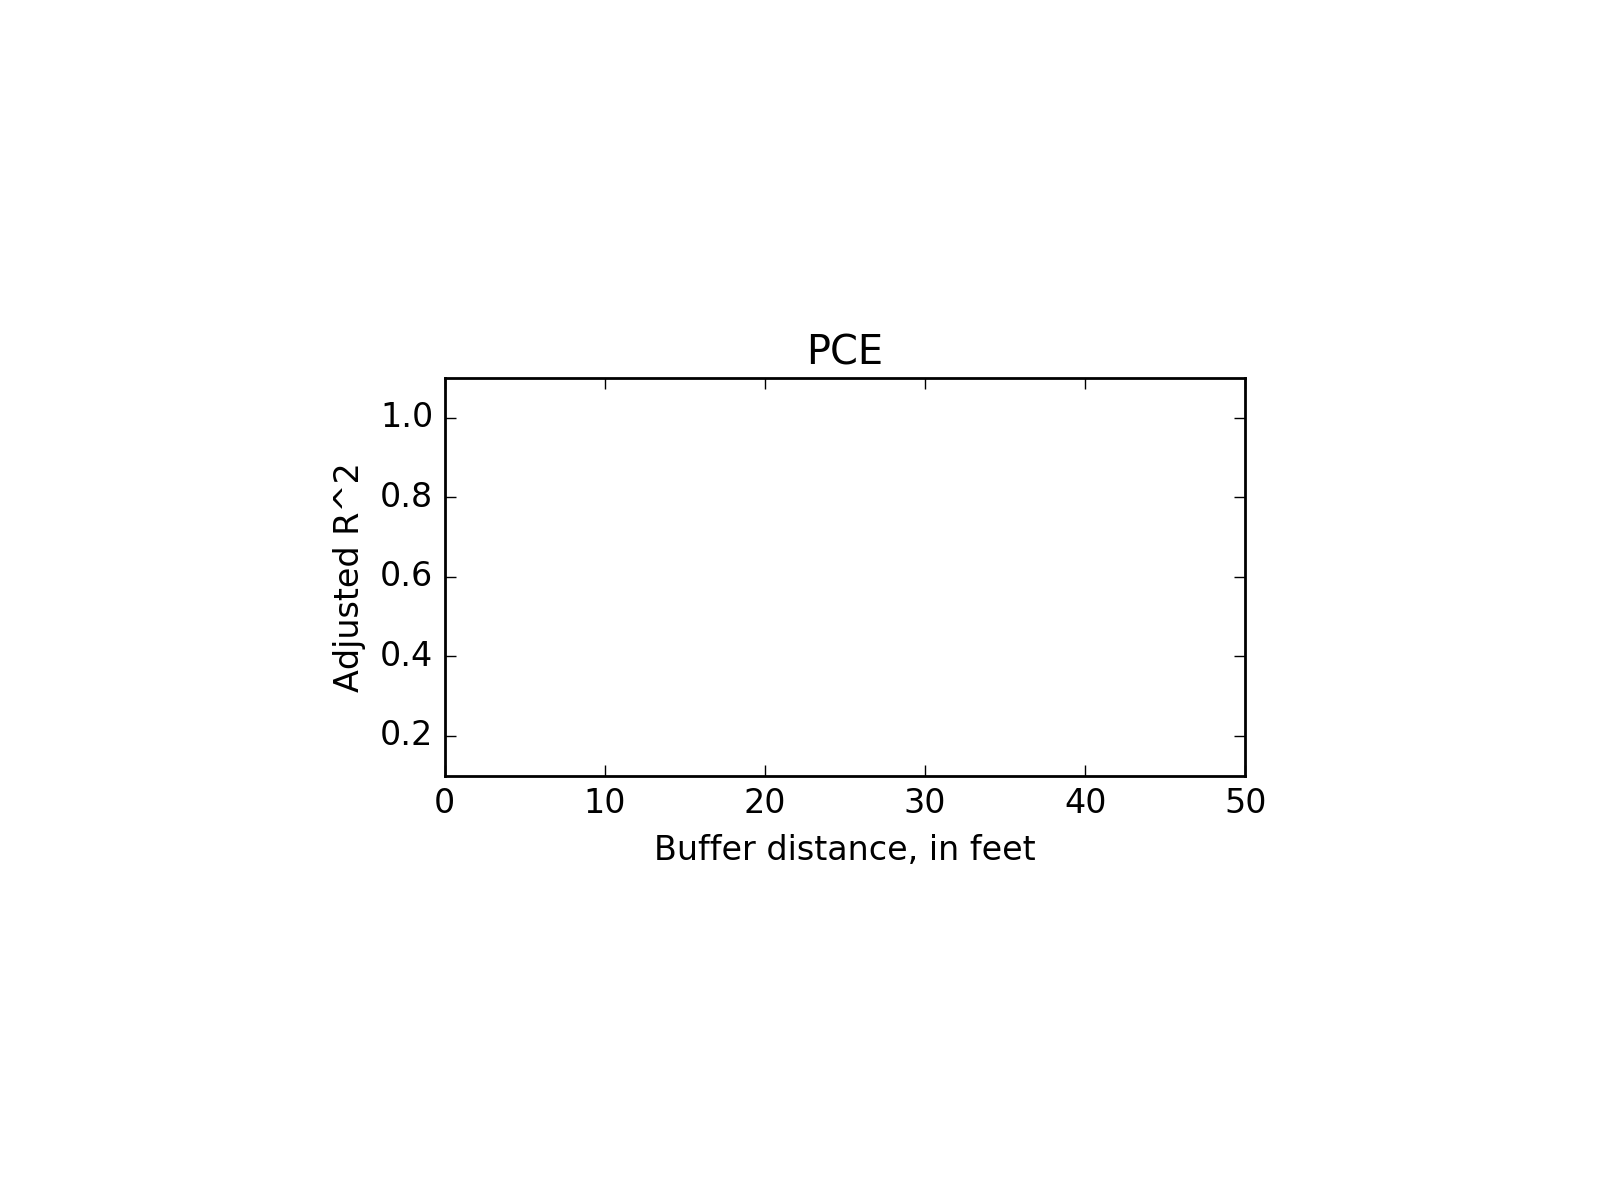

<IPython.core.display.Javascript object>


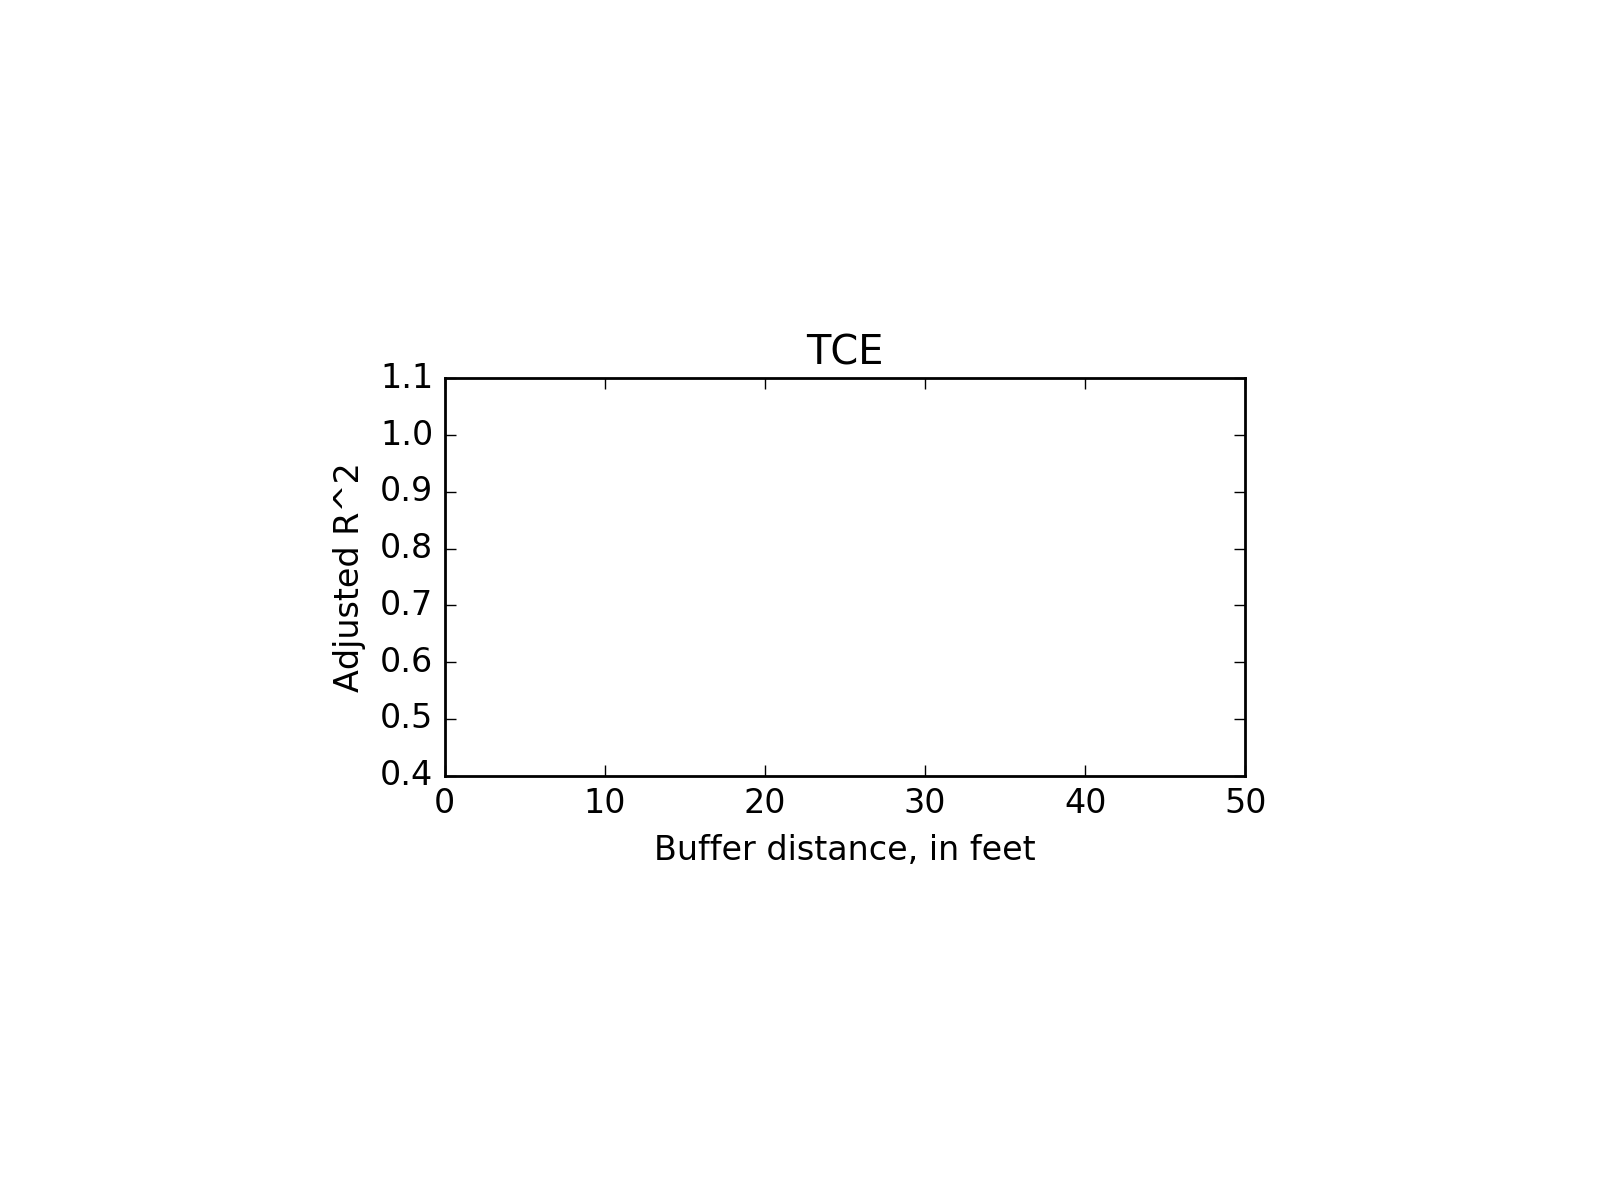

In [19]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots(dpi=200)

maxp=0

s=1
for i in range(0,17,1):
    for x in range(i+1,18,1):
        stats_MLR['PCE_plot_{}to{}ft'.format(i,x)]=np.nan
        stats_MLR['CFC_plot_{}to{}ft'.format(i,x)]=np.nan
        stats_MLR['TCE_plot_{}to{}ft'.format(i,x)]=np.nan


        stats_MLR.loc[(stats_MLR.iloc[:,(s-1)*15+1]<0.05)&(stats_MLR.iloc[:,(s-1)*15+2]<0.05)&(stats_MLR.iloc[:,(s-1)*15+4]>3)&(stats_MLR.iloc[:,(s-1)*15+3]<0.05),'PCE_plot_{}to{}ft'.format(i,x)]=stats_MLR.iloc[:,(s-1)*15+0]
        stats_MLR.loc[(stats_MLR.iloc[:,(s-1)*15+6]<0.05)&(stats_MLR.iloc[:,(s-1)*15+7]<0.05)&(stats_MLR.iloc[:,(s-1)*15+7]>3)&(stats_MLR.iloc[:,(s-1)*15+8]<0.05),'CFC_plot_{}to{}ft'.format(i,x)]=stats_MLR.iloc[:,(s-1)*15+5]
        stats_MLR.loc[(stats_MLR.iloc[:,(s-1)*15+11]<0.05)&(stats_MLR.iloc[:,(s-1)*15+12]<0.05)&(stats_MLR.iloc[:,(s-1)*15+14]>3)&(stats_MLR.iloc[:,(s-1)*15+13]<0.05),'TCE_plot_{}to{}ft'.format(i,x)]=stats_MLR.iloc[:,(s-1)*15+10]

        s+=1
z=0        
for i in range(0,17,1):
    for x in range(i+1,18,1):
        if (stats_MLR['PCE_plot_{}to{}ft'.format(i,x)].max()>maxp):
            for index, r2, n in zip(stats_MLR.index, stats_MLR['PCE_plot_{}to{}ft'.format(i,x)], stats_MLR['PCE_n_{}to{}ft'.format(i,x)]):                                       # <--
                if r2>maxp:
                    ax.annotate('{}'.format(int(n)),xy=(index-0.5, r2+.03),fontsize=6)            
            slr, = ax.plot(stats_MLR['PCE_plot_{}to{}ft'.format(i,x)],'-o', label='MLR {} to {} ft'.format(i,x),color=colors[z])
# #             slr, = ax.plot(stats_MLR['R2-PCE_{}to{}ft'.format(i,x)],'-o', alpha=0.2,color=colors[z])
            z+=1
        else:
            pass

plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc=(1.01,0),fontsize=5, ncol=1)

# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.title('PCE')
plt.xlabel('Buffer distance, in feet')
plt.ylabel('Adjusted R^2')
plt.xlim(0,50)
plt.ylim(0.1,1.10)
plt.tight_layout(pad=10)
plt.savefig("Soil_MLR_PCE.pdf")

plt.show()

# fig, ax = plt.subplots(dpi=200)
# for i in range(0,17,1):
#     for x in range(i+1,18,1):
#         if (stats_MLR['CFC_plot_{}to{}ft'.format(i,x)].max()>0):
            
#             slr, = ax.plot(stats_MLR['CFC_plot_{}to{}ft'.format(i,x)],'-o', label='MLR {} to {} ft'.format(i,x))
# #             slr, = ax.plot(stats_MLR['R2-PCE_{}to{}ft'.format(i,x)],'-o', alpha=0.3)
#         else:
#             pass
# plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc='best',fontsize='small', ncol=3)

# # for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
# #     ax.annotate('{}'.format(species),xy=(gw, tree))
# plt.title('CFC-113')
# plt.xlabel('Buffer distance, in feet')
# plt.ylabel('Adjusted R^2')
# plt.xlim(0,50)
   
# plt.show()

fig, ax = plt.subplots(dpi=200)

z=0
for i in range(0,17,1):
    for x in range(i+1,18,1):
        if (stats_MLR['TCE_plot_{}to{}ft'.format(i,x)].max()>0.7):
            for index, r2, n in zip(stats_MLR.index, stats_MLR['TCE_plot_{}to{}ft'.format(i,x)], stats_MLR['TCE_n_{}to{}ft'.format(i,x)]):                                       # <--
                if r2>maxp:
                    ax.annotate('{}'.format(int(n)),xy=(index-0.5, r2+.03),fontsize=6)            
            slr, = ax.plot(stats_MLR['TCE_plot_{}to{}ft'.format(i,x)],'-o', label='MLR {} to {} ft'.format(i,x),color=colors[z])
#             slr, = ax.plot(stats_MLR['R2-PCE_{}to{}ft'.format(i,x)],'-o', alpha=0.2,color=colors[z])
            z+=1
        else:
            pass
plt.legend(handler_map={slr: HandlerLine2D(numpoints=2)}, loc=(1.01,0),fontsize=5, ncol=1)

# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.title('TCE')
plt.xlabel('Buffer distance, in feet')
plt.ylabel('Adjusted R^2')
plt.xlim(0,50)
plt.ylim(0.4,1.1)
plt.tight_layout(pad=10)
plt.savefig("Soil_MLR_TCE.pdf")
   
plt.show()